In [1]:
# Dictionary of contractions and informal words
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "gonna": "going to",
    "wanna": "want to",
    "gotta": "got to",
    "kinda": "kind of",
    "sorta": "sort of",
    "coulda": "could have",
    "woulda": "would have",
    "shoulda": "should have",
    "mighta": "might have",
    "musta": "must have",
    "oughta": "ought to",
}
# Dictionary for censored words and their uncensored counterparts
censored_words = {
    r'f\*+k|f\*+ing|f\*+': 'fuck',
    r's\*+t|s\*+': 'shit',
    r'b\*+ch|b\*+': 'bitch',
    r'd\*+n|d\*+': 'damn',
    r'a\*+hole|a\*+': 'asshole',
    r'b\*+stard|b\*+': 'bastard',
    r'c\*+t|c\*+': 'cunt',
    r'p\*+ssy|p\*+': 'pussy',
    r'd\*+ck|d\*+': 'dick',
    r'mo\*+erf\*+er|mo\*+': 'motherfucker',
}

In [2]:
import os
import json
import re
from itertools import permutations
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8-sig') as f:
        return json.load(f)

def extract_transcripts(data):
    transcripts = []
    for transcript in data.get("transcripts", []):
        transcripts.append(transcript.get("text", ""))
    return " ".join(transcripts)

def preprocess_text(text):
     # Normalize censored words
    for pattern, replacement in censored_words.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)

     # Remove Unicode characters that are not ASCII
    text = text.encode('ascii', 'ignore').decode()
    
    # Convert text to lowercase
    text = text.lower()
    
    # Replace contractions using regular expressions
    def replace(match):
        return contractions[match.group(0)]
    
    pattern = re.compile(r'\b(' + '|'.join(contractions.keys()) + r')\b')
    text = pattern.sub(replace, text)

    # Remove info like [music]
    text = re.sub(r'\[.*?\]', '', text).strip()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def align_transcripts(transcripts):
    words = []
    for transcript in transcripts:
        word_list = transcript['text'].split()
        speakers = [transcript['speaker']['name']] * len(word_list)
        words.extend(zip(word_list, speakers))
    return words

def create_confusion_matrix(true_transcripts, predicted_transcripts):
    true_speakers = {seg["speaker"]["name"]: [] for seg in true_transcripts}
    pred_speakers = {seg["speaker"]["name"]: [] for seg in predicted_transcripts}
    
    for seg in true_transcripts:
        true_speakers[seg["speaker"]["name"]].extend(seg["text"].split())
    
    for seg in predicted_transcripts:
        pred_speakers[seg["speaker"]["name"]].extend(seg["text"].split())

    true_speaker_list = list(true_speakers.keys())
    pred_speaker_list = list(pred_speakers.keys())

    confusion_matrix = np.zeros((len(true_speaker_list), len(pred_speaker_list)))

    for i, true_speaker in enumerate(true_speaker_list):
        true_words = set(true_speakers[true_speaker])
        for j, pred_speaker in enumerate(pred_speaker_list):
            pred_words = set(pred_speakers[pred_speaker])
            confusion_matrix[i, j] = len(true_words.intersection(pred_words))

    return confusion_matrix, true_speaker_list, pred_speaker_list

def map_speakers(true_transcripts, predicted_transcripts):
    confusion_matrix, true_speaker_list, pred_speaker_list = create_confusion_matrix(true_transcripts, predicted_transcripts)
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)
    speaker_mapping = {pred_speaker_list[col]: true_speaker_list[row] for row, col in zip(row_ind, col_ind)}
    return speaker_mapping

def calculate_wder(true_transcripts, predicted_transcripts, speaker_mapping):
    # print("true_transcripts", true_transcripts)
    # print("predicted_transcripts", predicted_transcripts)
    # print("speaker_mapping", speaker_mapping)
    true_text = []
    pred_text = []
    for seg in true_transcripts:
        true_text.extend([(word, seg["speaker"]["name"]) for word in seg["text"].split()])
    
    for seg in predicted_transcripts:
        mapped_speaker = speaker_mapping.get(seg["speaker"]["name"], "UNMAPPED")
        pred_text.extend([(word, mapped_speaker) for word in seg["text"].split()])

    true_words = [word for word, _ in true_text]
    pred_words = [word for word, _ in pred_text]
    
    S_IS = 0
    C_IS = 0
    S = 0
    C = 0

    true_index = 0
    pred_index = 0
    while true_index < len(true_words) and pred_index < len(pred_words):
        true_word = true_words[true_index]
        pred_word = pred_words[pred_index]
        if true_word == pred_word:
            C += 1
            if true_text[true_index][1] != pred_text[pred_index][1]:
                C_IS += 1
            true_index += 1
            pred_index += 1
        else:
            S += 1
            if true_text[true_index][1] != pred_text[pred_index][1]:
                S_IS += 1
            true_index += 1
            pred_index += 1
    
    # If there are remaining words in true or predicted transcripts
    while true_index < len(true_words):
        S += 1
        S_IS += 1  # The remaining true words are considered as substitutions with incorrect speakers
        true_index += 1
        
    while pred_index < len(pred_words):
        S += 1
        S_IS += 1  # The remaining predicted words are considered as substitutions with incorrect speakers
        pred_index += 1

    # print("S_IS", S_IS)
    # print("C_IS", C_IS)
    # print("S", S)
    # print("C", C)
    
    WDER = (S_IS + C_IS) / (S + C)
    return WDER

def match_files_and_evaluate(manual_folder, generated_folders):
    manual_files = [f for f in os.listdir(manual_folder) if f.endswith('.json')]
    results = []

    for gen_folder in generated_folders:
        gen_files = [f for f in os.listdir(gen_folder) if f.endswith('.json')]
        model_name = os.path.basename(gen_folder)

        for gen_file in gen_files:
            yt_video_id = load_json(os.path.join(gen_folder, gen_file)).get("yt_video_id", "")
            if not yt_video_id:
                continue
            manual_file = next((f for f in manual_files if yt_video_id in load_json(os.path.join(manual_folder, f)).get("yt_video_id", "")), None)
            if manual_file:
                manual_data = load_json(os.path.join(manual_folder, manual_file))
                generated_data = load_json(os.path.join(gen_folder, gen_file))

                # Preprocess text in both true and predicted transcripts
                for transcript in manual_data['transcripts']:
                    transcript['text'] = preprocess_text(transcript['text'])
                
                for transcript in generated_data['transcripts']:
                    transcript['text'] = preprocess_text(transcript['text'])

                speaker_mapping = map_speakers(manual_data['transcripts'], generated_data['transcripts'])
                wder = calculate_wder(manual_data['transcripts'], generated_data['transcripts'], speaker_mapping)
                results.append({
                    "model": model_name,
                    "manual_file": manual_file,
                    "generated_file": gen_file,
                    "yt_video_id": yt_video_id,
                    "wder": wder
                })

    return results

In [3]:
manual_folder = 'test_data'
generated_folders = [
    'Whisper-Pyannote_large-v3',
    # 'result_audio_files_base.en',
    # 'result_audio_files_base',
    # 'result_audio_files_tiny.en',
    # 'result_audio_files_tiny',
    # 'result_audio_files_small.en',
    # 'result_audio_files_small',
    # 'result_audio_files_medium.en',
    # 'result_audio_files_medium',
    # 'result_audio_files_large',
    # 'result_audio_files_large--no-stem',
    # 'result_audio_files_large-v1',
    # 'result_audio_files_large-v2',
    'Whisper-Nemo_large-v3',
    # 'result_audio_files_large-v3--no-stem',
    # 'result_audio_files_OLD_large-v3'
    # Add more generated folders as needed
]

results = match_files_and_evaluate(manual_folder, generated_folders)

In [4]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='manual_file')

,model,manual_file,generated_file,yt_video_id,wder
48,Whisper-Nemo_large-v3,after_covid_ANTI_SJW.json,after_covid_ANTI_SJW_HqIblDLzY_0.json,HqIblDLzY_0,0.369909
20,Whisper-Pyannote_large-v3,after_covid_ANTI_SJW.json,after_covid_ANTI_SJW_HqIblDLzY_0.json,HqIblDLzY_0,0.456359
27,Whisper-Pyannote_large-v3,after_covid_ANTI_THEIST.json,after_covid_ANTI_THEIST_B0Ryo6HcOys.json,B0Ryo6HcOys,0.333725
55,Whisper-Nemo_large-v3,after_covid_ANTI_THEIST.json,after_covid_ANTI_THEIST_B0Ryo6HcOys.json,B0Ryo6HcOys,0.301998
12,Whisper-Pyannote_large-v3,after_covid_BLACK.json,after_covid_BLACK_fzvbx25xqnU.json,fzvbx25xqnU,0.202663
40,Whisper-Nemo_large-v3,after_covid_BLACK.json,after_covid_BLACK_fzvbx25xqnU.json,fzvbx25xqnU,0.198035
54,Whisper-Nemo_large-v3,after_covid_CONSPIRACY.json,after_covid_CONSPIRACY_kq2E7LBClnY.json,kq2E7LBClnY,0.082984
26,Whisper-Pyannote_large-v3,after_covid_CONSPIRACY.json,after_covid_CONSPIRACY_kq2E7LBClnY.json,kq2E7LBClnY,0.189976
10,Whisper-Pyannote_large-v3,after_covid_LGBT.json,after_covid_LGBT_-roa8M8hT-E.json,-roa8M8hT-E,0.008811
38,Whisper-Nemo_large-v3,after_covid_LGBT.json,after_covid_LGBT_-roa8M8hT-E.json,-roa8M8hT-E,0.006385


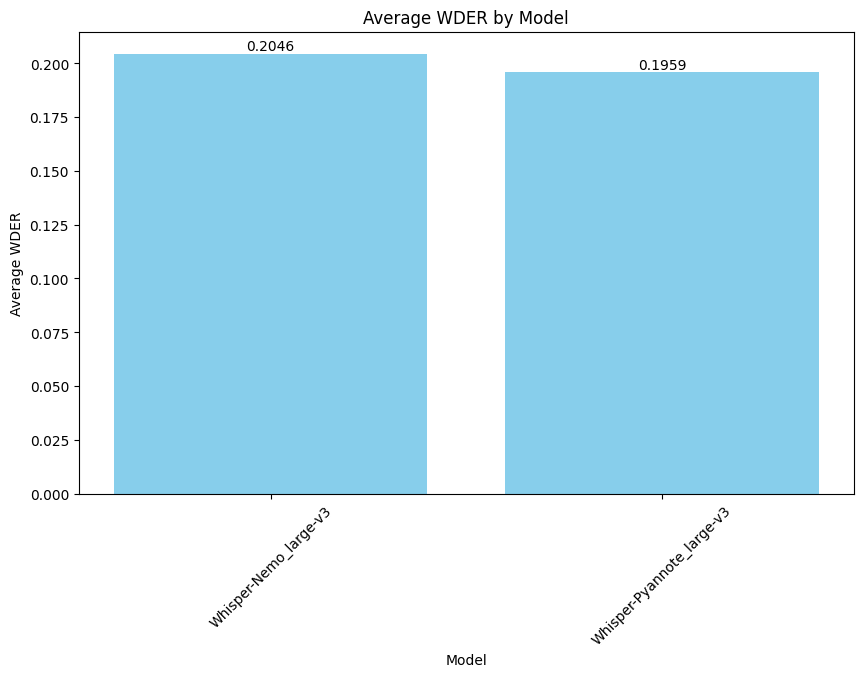

In [5]:
# Group by model and calculate average WER
average_wder = results_df.groupby('model')['wder'].mean().reset_index()
average_wder

# Plotting the results with detailed values on top of bars
plt.figure(figsize=(10, 6))
bars = plt.bar(average_wder['model'], average_wder['wder'], color='skyblue')

# Add detailed values on top of bars
for bar, value in zip(bars, average_wder['wder']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{value:.4f}', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Average WDER')
plt.title('Average WDER by Model')
plt.xticks(rotation=45)
plt.show()

In [6]:
# import numpy as np
# from scipy.optimize import linear_sum_assignment

# def create_confusion_matrix(true_transcripts, predicted_transcripts):
#     true_speakers = {seg["speaker"]["name"]: [] for seg in true_transcripts}
#     pred_speakers = {seg["speaker"]["name"]: [] for seg in predicted_transcripts}
    
#     for seg in true_transcripts:
#         true_speakers[seg["speaker"]["name"]].extend(seg["text"].split())
    
#     for seg in predicted_transcripts:
#         pred_speakers[seg["speaker"]["name"]].extend(seg["text"].split())

#     true_speaker_list = list(true_speakers.keys())
#     pred_speaker_list = list(pred_speakers.keys())

#     confusion_matrix = np.zeros((len(true_speaker_list), len(pred_speaker_list)))

#     for i, true_speaker in enumerate(true_speaker_list):
#         true_words = set(true_speakers[true_speaker])
#         for j, pred_speaker in enumerate(pred_speaker_list):
#             pred_words = set(pred_speakers[pred_speaker])
#             confusion_matrix[i, j] = len(true_words.intersection(pred_words))

#     return confusion_matrix, true_speaker_list, pred_speaker_list

# def map_speakers(true_transcripts, predicted_transcripts):
#     confusion_matrix, true_speaker_list, pred_speaker_list = create_confusion_matrix(true_transcripts, predicted_transcripts)
#     row_ind, col_ind = linear_sum_assignment(-confusion_matrix)
#     speaker_mapping = {pred_speaker_list[col]: true_speaker_list[row] for row, col in zip(row_ind, col_ind)}
#     return speaker_mapping

# def calculate_wder(true_transcripts, predicted_transcripts, speaker_mapping):
#     print("true_transcripts", true_transcripts)
#     print("predicted_transcripts", predicted_transcripts)
#     print("speaker_mapping", speaker_mapping)
#     true_text = []
#     pred_text = []
#     for seg in true_transcripts:
#         true_text.extend([(word, seg["speaker"]["name"]) for word in seg["text"].split()])
    
#     for seg in predicted_transcripts:
#         mapped_speaker = speaker_mapping.get(seg["speaker"]["name"], "UNMAPPED")
#         pred_text.extend([(word, mapped_speaker) for word in seg["text"].split()])

#     true_words = [word for word, _ in true_text]
#     pred_words = [word for word, _ in pred_text]
    
#     S_IS = 0
#     C_IS = 0
#     S = 0
#     C = 0

#     true_index = 0
#     pred_index = 0
#     while true_index < len(true_words) and pred_index < len(pred_words):
#         true_word = true_words[true_index]
#         pred_word = pred_words[pred_index]
#         if true_word == pred_word:
#             C += 1
#             if true_text[true_index][1] != pred_text[pred_index][1]:
#                 C_IS += 1
#             true_index += 1
#             pred_index += 1
#         else:
#             S += 1
#             if true_text[true_index][1] != pred_text[pred_index][1]:
#                 S_IS += 1
#             true_index += 1
#             pred_index += 1
    
#     # If there are remaining words in true or predicted transcripts
#     while true_index < len(true_words):
#         S += 1
#         S_IS += 1  # The remaining true words are considered as substitutions with incorrect speakers
#         true_index += 1
        
#     while pred_index < len(pred_words):
#         S += 1
#         S_IS += 1  # The remaining predicted words are considered as substitutions with incorrect speakers
#         pred_index += 1

#     print("S_IS", S_IS)
#     print("C_IS", C_IS)
#     print("S", S)
#     print("C", C)
    
#     WDER = (S_IS + C_IS) / (S + C)
#     return WDER

# # Example Usage
# true_transcripts = [
#     {
#             "text": "Hello World",
#             "speaker": {
#                 "name": "Speaker 0"
#             }
#         },
#         {
#             "text": "Bryan",
#             "speaker": {
#                 "name": "Speaker 1"
#             }
#         }
# ]

# predicted_transcripts = [
#     {
#             "text": "Hello World Bryan",
#             "speaker": {
#                 "name": "A"
#             }
#         }
# ]

# speaker_mapping = map_speakers(true_transcripts, predicted_transcripts)
# wder = calculate_wder(true_transcripts, predicted_transcripts, speaker_mapping)
# print("Speaker Mapping:", speaker_mapping)
# print("Word Diarization Error Rate (WDER):", wder)
